# Exploratory Data Analysis (EDA) 

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Show plots inline
%matplotlib inline

In [186]:
# load clearned training and testing datasets
df_train = pd.read_csv('df_train_cleaned.csv')
df_test = pd.read_csv('df_test_cleaned.csv')

In [187]:
df_train.shape

(1460, 74)

In [188]:
df_test.shape

(1459, 73)

# 1. Clean Up Missing Values

In [189]:
# only show columns with missing values of Train data
print("Train data_columns with missing values")
pd.set_option('display.max_rows', None)
train_missing = pd.concat([df_train.isna().sum(), 100 * df_train.isna().mean()], axis=1)
train_missing.columns=['count', '%']
train_missing = train_missing[train_missing['count'] > 0]
train_missing.sort_values(by='count')

Train data_columns with missing values


,count,%
Electrical,1,0.068493
MasVnrArea,8,0.547945
BsmtQual,37,2.534247
BsmtCond,37,2.534247
BsmtFinType1,37,2.534247
BsmtExposure,38,2.602740
BsmtFinType2,38,2.602740
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


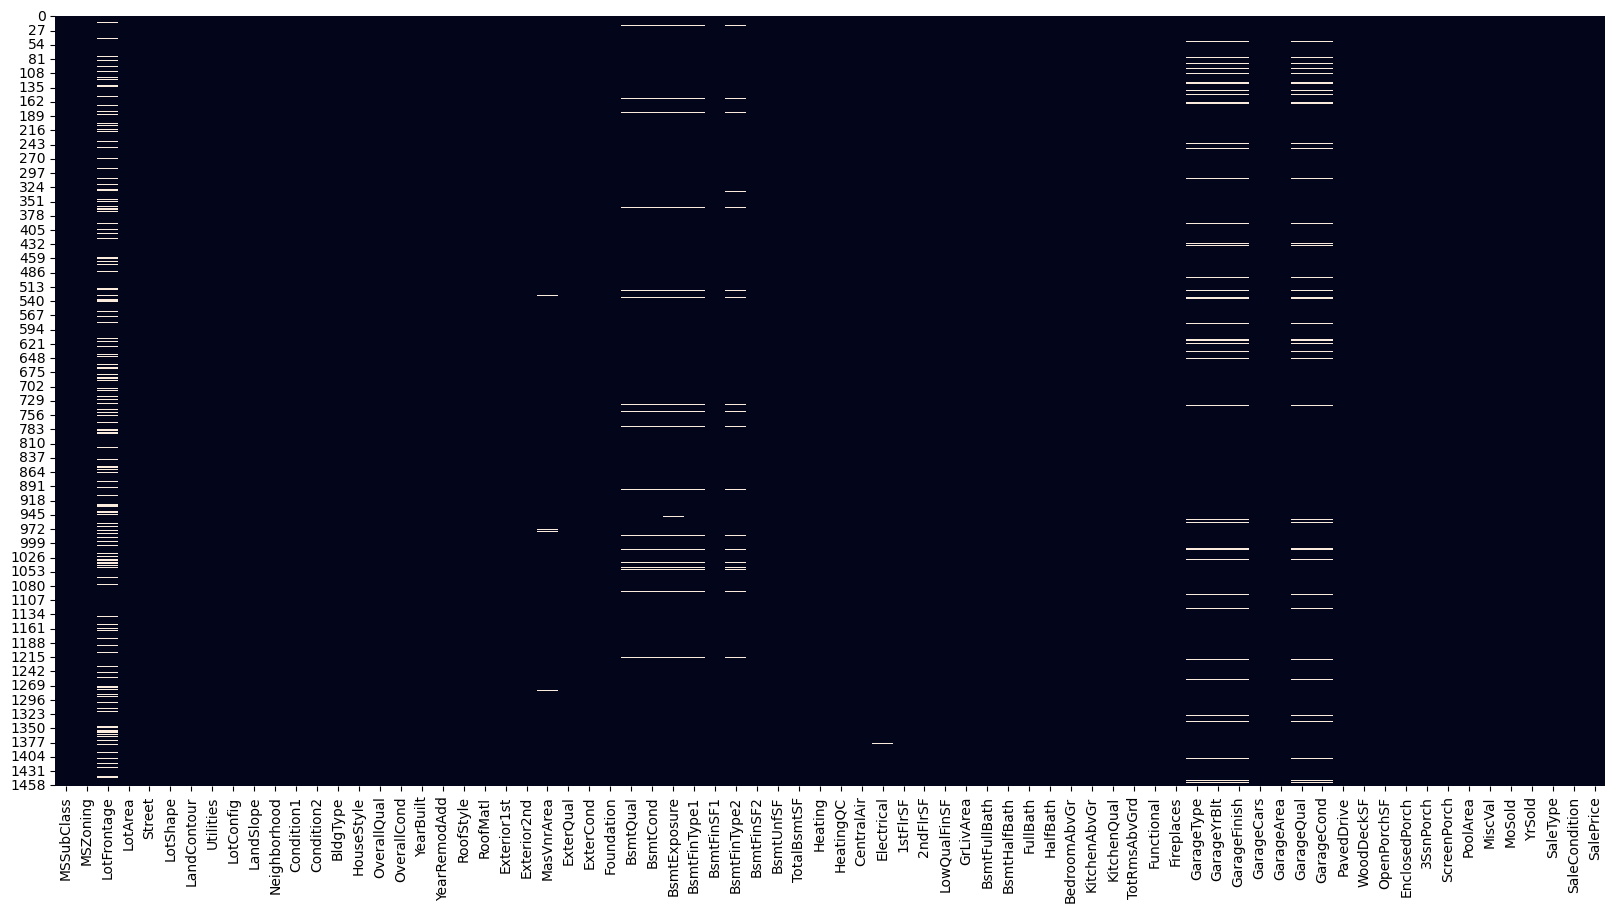

In [190]:
# display the missing value distribution in train data
plt.figure(figsize=(20, 10))
sns.heatmap(df_train.isnull(), cbar=False)
plt.xticks(rotation=90)
plt.show()

In [191]:
# only show columns with missing values of Test data
print("Test data_columns with missing values")
pd.set_option('display.max_rows', None)
test_missing = pd.concat([df_test.isna().sum(), 100 * df_test.isna().mean()], axis=1)
test_missing.columns=['count', '%']
test_missing = test_missing[test_missing['count'] > 0]
test_missing.sort_values(by='count')

Test data_columns with missing values


,count,%
BsmtUnfSF,1,0.068540
GarageArea,1,0.068540
GarageCars,1,0.068540
KitchenQual,1,0.068540
TotalBsmtSF,1,0.068540
BsmtFinSF2,1,0.068540
BsmtFinSF1,1,0.068540
SaleType,1,0.068540
Exterior1st,1,0.068540
Exterior2nd,1,0.068540


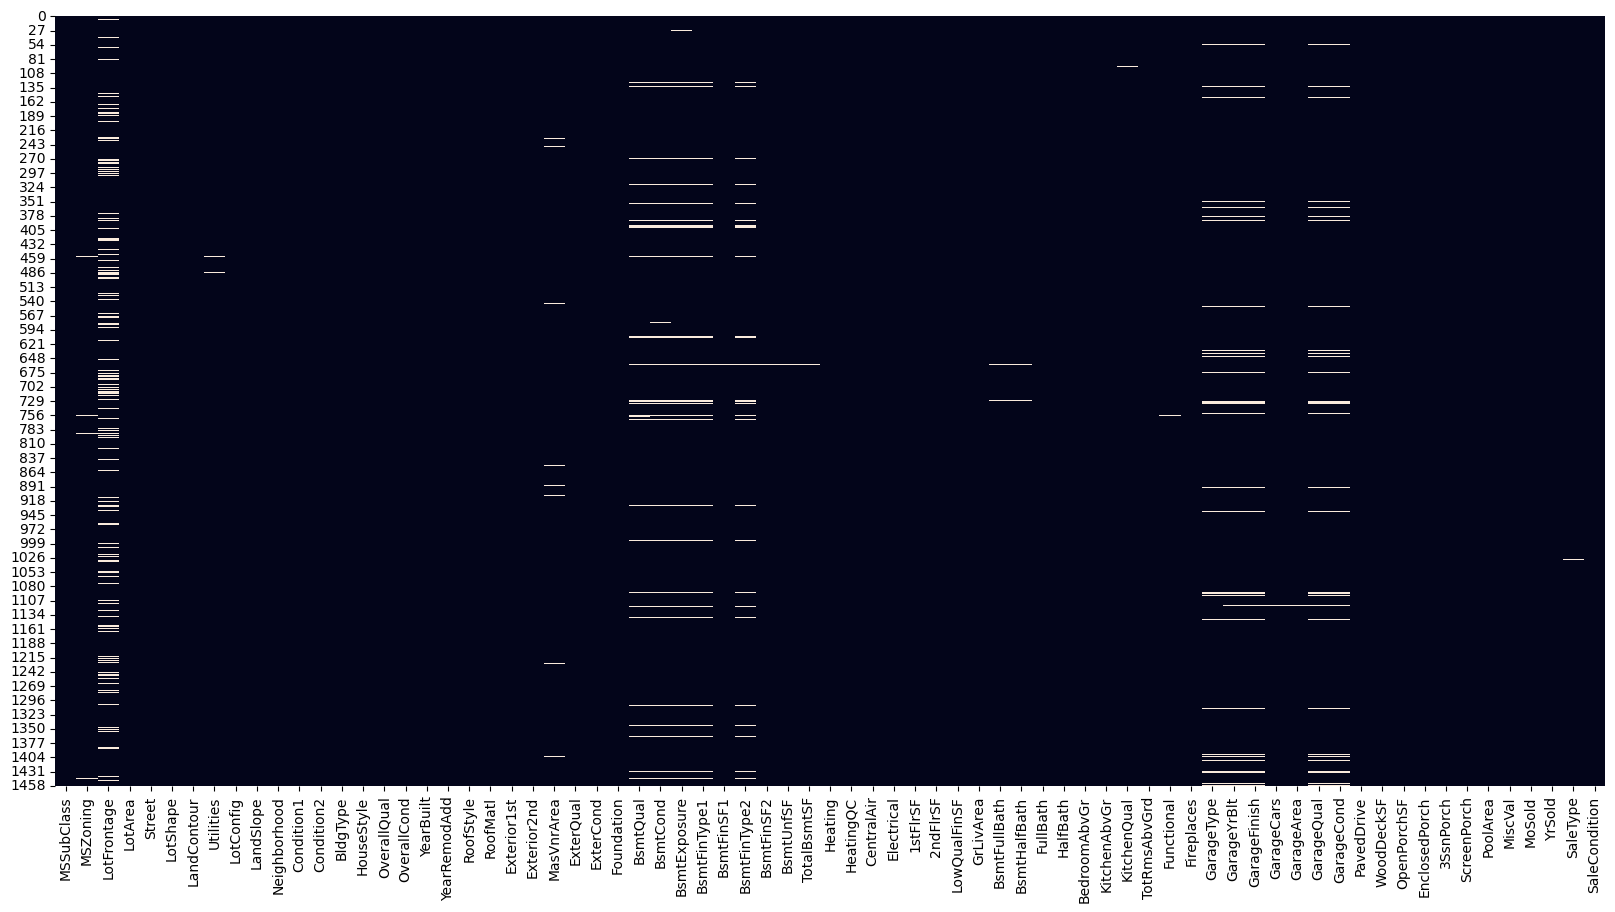

In [192]:
# display the missing value distribution in test data
plt.figure(figsize=(20, 10))
sns.heatmap(df_test.isnull(), cbar=False)
plt.xticks(rotation=90)
plt.show()

### 1.1 Drop rows with missing values accounting for less than 5% of the total records

In [193]:
# Drop missing values with less than 5% of total values
train_cols_to_drop = df_train.columns[df_train.isna().mean() <= 0.05]
print(train_cols_to_drop)
print(len(train_cols_to_drop))

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       

In [194]:
df_train.dropna(subset=train_cols_to_drop, inplace=True)

In [195]:
df_train.shape

(1412, 74)

In [196]:
# Drop missing values with less than 5% of total values
test_cols_to_drop = df_test.columns[df_test.isna().mean() <= 0.05]
print(test_cols_to_drop)
print(len(test_cols_to_drop))

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       

In [197]:
df_test.dropna(subset=test_cols_to_drop, inplace=True)

In [198]:
df_test.shape

(1388, 73)

In [199]:
# only show columns with missing values after dropping values <5%
print("train data columns with missing values after dropping <5% missing values")
pd.set_option('display.max_rows', None)
train_missing = pd.concat([df_train.isna().sum(), 100 * df_train.isna().mean()], axis=1)
train_missing.columns=['count', '%']
train_missing = train_missing[train_missing['count'] > 0]
train_missing.sort_values(by='count')

train data columns with missing values after dropping <5% missing values


,count,%
GarageType,74,5.240793
GarageYrBlt,74,5.240793
GarageFinish,74,5.240793
GarageQual,74,5.240793
GarageCond,74,5.240793
LotFrontage,251,17.776204


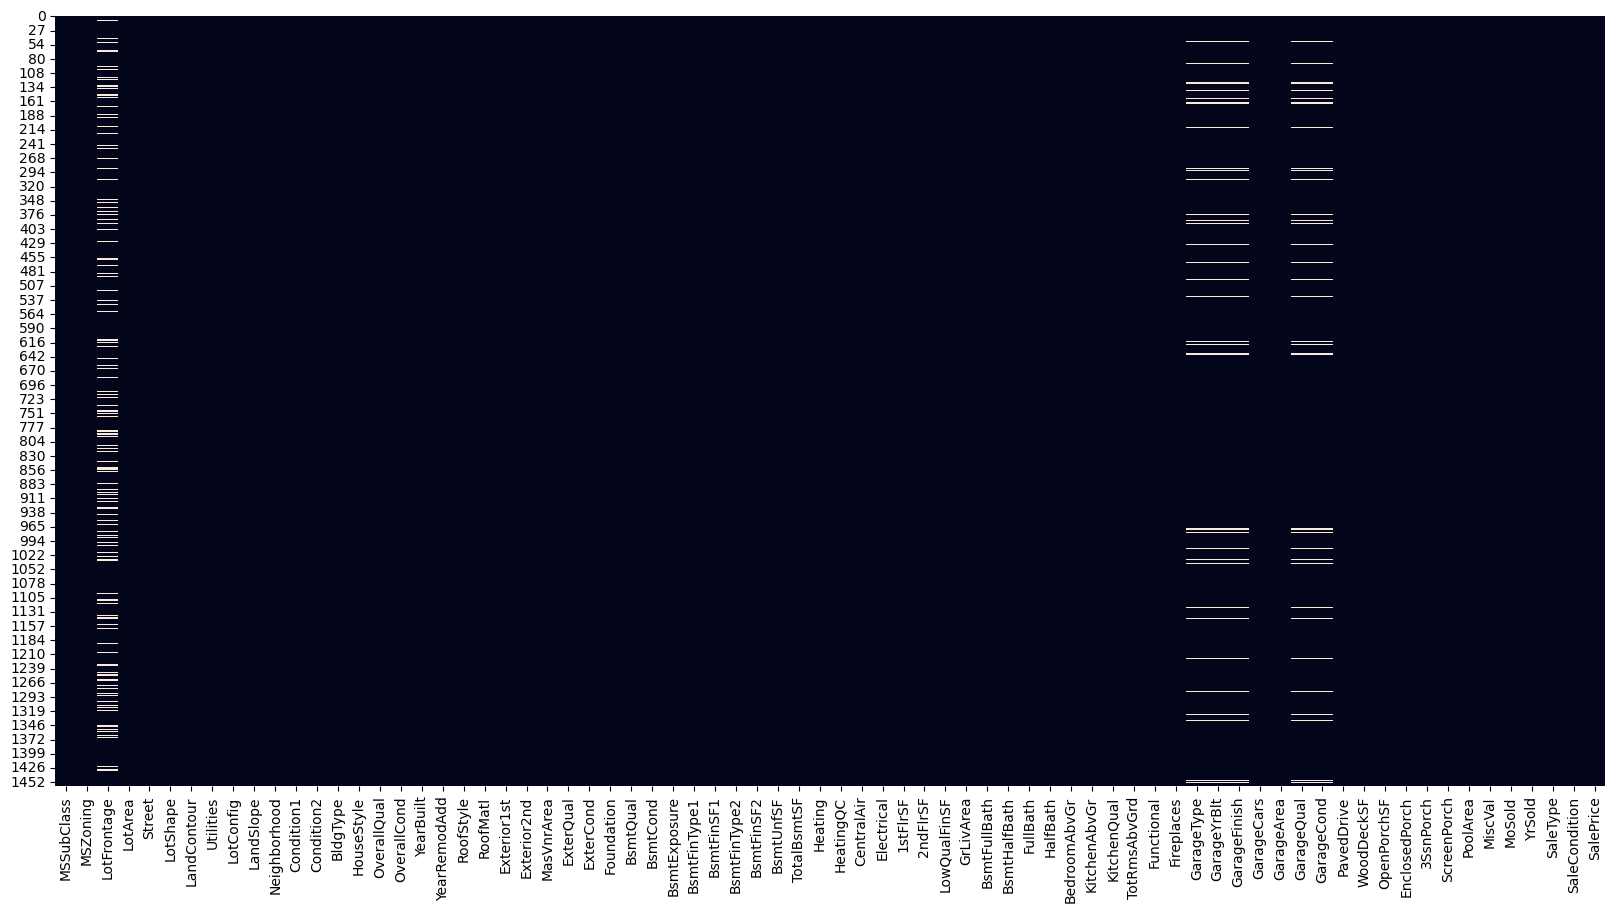

In [200]:
# display the missing value distribution in cleaned train data
plt.figure(figsize=(20, 10))
sns.heatmap(df_train.isnull(), cbar=False)
plt.xticks(rotation=90)
plt.show()

In [201]:
# only show columns with missing values in test data after cleaning
print("test data columns with missing values after dropping <5% missing values")
pd.set_option('display.max_rows', None)
test_missing = pd.concat([df_test.isna().sum(), 100 * df_test.isna().mean()], axis=1)
test_missing.columns=['count', '%']
test_missing = test_missing[test_missing['count'] > 0]
test_missing.sort_values(by='count')

test data columns with missing values after dropping <5% missing values


,count,%
GarageType,67,4.827089
GarageYrBlt,68,4.899135
GarageFinish,68,4.899135
GarageQual,68,4.899135
GarageCond,68,4.899135
LotFrontage,214,15.417867


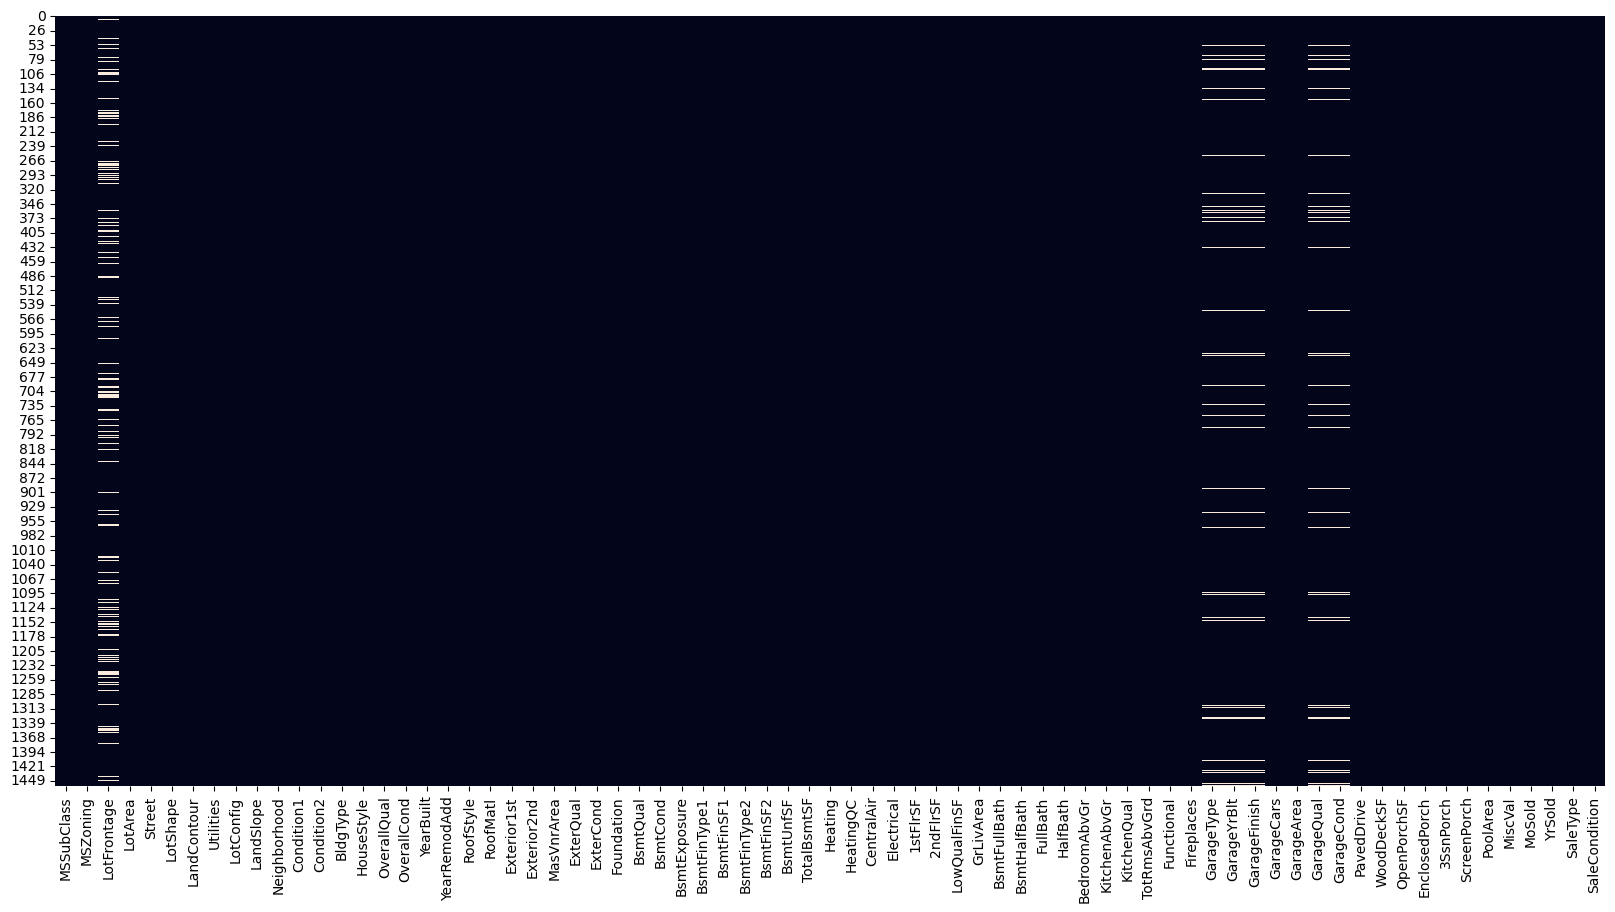

In [202]:
# display the missing value distribution in cleaned test data
plt.figure(figsize=(20, 10))
sns.heatmap(df_test.isnull(), cbar=False)
plt.xticks(rotation=90)
plt.show()

After removing records with null values, which accounts for less than 5% of the data, the distribution of remaining missing values in both test and train datasets shows a consistent pattern. Specifically, the missing values in five garage-related variables--GarageType, GarageYrBlt, GarageFinish, GarageQual, and GarageCond--occur in the same group of records. The proportion of these missing values is now either below 5% in test dataset or slightly above the 5% threshold--our established criterion for dropping data--but remains below 6% in train dataset. Given this, it is reasonable to drop these records, as this approach is both simpler and more practical than imputing values for each variable indiviually. 

### 1.2 Remove missing values in five garage-related variables: GarageType, GarageYrBlt, GarageFinish, GarageQual, and GarageCond

In [203]:
# Create list containing columns names of five garage-related variables
five_gar_cols = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']

# Drop missing values in train and test dataset
df_train.dropna(subset=five_gar_cols, inplace=True)
df_test.dropna(subset=five_gar_cols, inplace=True)

In [204]:
# only show columns with missing values in train dataset after dropping missing values in five garage-related variables
print("train data columns with missing values after dropping missing values in five garage-related variables")
pd.set_option('display.max_rows', None)
train_missing = pd.concat([df_train.isna().sum(), 100 * df_train.isna().mean()], axis=1)
train_missing.columns=['count', '%']
train_missing = train_missing[train_missing['count'] > 0]
train_missing.sort_values(by='count')

train data columns with missing values after dropping missing values in five garage-related variables


,count,%
LotFrontage,244,18.236173


In [205]:
# only show columns with missing values in test dataset after dropping missing values in five garage-related variables
print("test data columns with missing values after dropping missing values in five garage-related variables")
pd.set_option('display.max_rows', None)
test_missing = pd.concat([df_test.isna().sum(), 100 * df_test.isna().mean()], axis=1)
test_missing.columns=['count', '%']
test_missing = test_missing[test_missing['count'] > 0]
test_missing.sort_values(by='count')

test data columns with missing values after dropping missing values in five garage-related variables


,count,%
LotFrontage,211,15.984848


In [206]:
df_train.shape

(1338, 74)

In [207]:
df_test.shape

(1320, 73)

The two steps of removing missing values result in the deletion of 122 records from the train dataset, accounting for 8.4% of the total, and 139 records from the test dataset, accounting for 9.5% of the total. The LotFrontage column is the only variable with missing values, which account for 15-20% of the total records in both datasets. Next, I will find the most related variable to LotFrontage from the other 72 variables and use it for missing value imputation.

### 1.3 Imput missing values in the LotFrontage variable with the Median.

In [208]:
print("The LotFrontage column information in the train dataset\n")
dtype = df_train['LotFrontage'].dtype
top_5_values = (
        df_train['LotFrontage']
        .dropna()
        .value_counts().
        head(5)
        )
missing_count = df_train['LotFrontage'].isna().sum()
print(f"LotFrontage Dtype: {dtype}")
print(f"Top 5 most common non-null values: \n{top_5_values}")
print(f"Missing Count: {missing_count}\n")

The LotFrontage column information in the train dataset

LotFrontage Dtype: float64
Top 5 most common non-null values: 
LotFrontage
60.0    120
80.0     67
70.0     63
75.0     50
50.0     49
Name: count, dtype: int64
Missing Count: 244



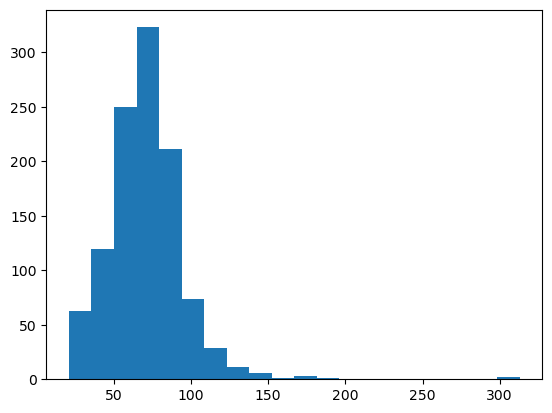

In [209]:
plt.hist(df_train['LotFrontage'].dropna(), bins=20)
plt.show()

In [210]:
corr_matrix = df_train.select_dtypes(include=['int64', 'float64']).dropna().corr()
# Get absolute correlation values with LotFrontage (excluding itself)
lotfrontage_corr = corr_matrix['LotFrontage'].drop('LotFrontage').abs()

# Find the most correlated variable
most_related_variable = lotfrontage_corr.idxmax()
highest_corr_value = lotfrontage_corr.max()

print(f'Most correlated variable: {most_related_variable} (Correlation:{highest_corr_value})')

Most correlated variable: 1stFlrSF (Correlation:0.45303513653263955)


The optimal imputation strategy depends on the distribution of LotFrontage and its relationship with 1stFlrSF. While LotFrontage exhibits a strong single mode, its moderate correlation with 1stFlrSF (0.453) suggests that predictive imputation is preferable. This approach preserves data variability while ensuring consistency with existing values.

In [211]:
from sklearn.linear_model import LinearRegression

# Prepare data
df_train_non_missing = df_train.dropna(subset=["LotFrontage"])
df_train_missing = df_train[df_train["LotFrontage"].isnull()]

# Train regression model
X_train = df_train_non_missing[["1stFlrSF"]]
y_train = df_train_non_missing["LotFrontage"]

model = LinearRegression()
model.fit(X_train, y_train)

# Predict missing values
X_missing = df_train_missing[["1stFlrSF"]]
df_train_predicted_values = model.predict(X_missing)

# Fill missing values
df_train.loc[df_train["LotFrontage"].isnull(), "LotFrontage"] = df_train_predicted_values


In [212]:
df_train["LotFrontage"].isna().sum()

0

In [213]:
print("The LotFrontage column information in the test dataset\n")
dtype = df_test['LotFrontage'].dtype
top_5_values = (
        df_test['LotFrontage']
        .dropna()
        .value_counts().
        head(5)
        )
missing_count = df_test['LotFrontage'].isna().sum()
print(f"LotFrontage Dtype: {dtype}")
print(f"Top 5 most common non-null values: \n{top_5_values}")
print(f"Missing Count: {missing_count}\n")

The LotFrontage column information in the test dataset

LotFrontage Dtype: float64
Top 5 most common non-null values: 
LotFrontage
60.0    117
80.0     66
70.0     60
50.0     51
75.0     47
Name: count, dtype: int64
Missing Count: 211



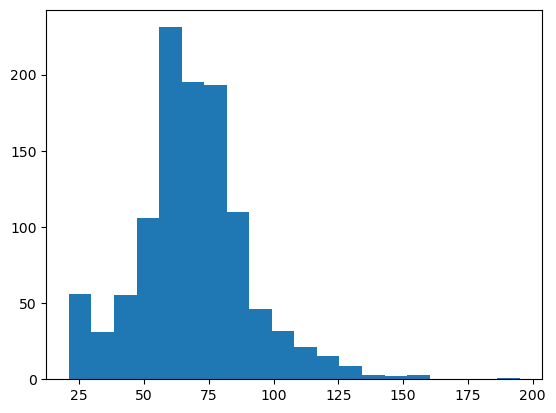

In [214]:
plt.hist(df_test['LotFrontage'].dropna(), bins=20)
plt.show()

In [215]:
from sklearn.linear_model import LinearRegression

# Prepare data
df_test_non_missing = df_test.dropna(subset=["LotFrontage"])
df_test_missing = df_test[df_test["LotFrontage"].isnull()]

# Train regression model
X_test = df_test_non_missing[["1stFlrSF"]]
y_test = df_test_non_missing["LotFrontage"]

model = LinearRegression()
model.fit(X_test, y_test)

# Predict missing values
X_missing = df_test_missing[["1stFlrSF"]]
df_test_predicted_values = model.predict(X_missing)

# Fill missing values
df_test.loc[df_test["LotFrontage"].isnull(), "LotFrontage"] = df_test_predicted_values

In [216]:
df_test['LotFrontage'].isna().sum()

0

In [217]:
# only show columns with missing values of Test data
print("Test data columns with missing values")
pd.set_option('display.max_rows', None)
test_missing = pd.concat([df_test.isna().sum(), 100 * df_test.isna().mean()], axis=1)
test_missing.columns=['count', '%']
test_missing = test_missing[test_missing['count'] > 0]
test_missing.sort_values(by='count')

Test data columns with missing values


,count,%


In [218]:
# only show columns with missing values of Train data
print("Train data columns with missing values")
pd.set_option('display.max_rows', None)
train_missing = pd.concat([df_train.isna().sum(), 100 * df_train.isna().mean()], axis=1)
train_missing.columns=['count', '%']
train_missing = train_missing[train_missing['count'] > 0]
train_missing.sort_values(by='count')


Train data columns with missing values


,count,%


In [219]:
df_train.shape

(1338, 74)

In [220]:
df_test.shape

(1320, 73)

All missing data in both the test and train datasets have now been addressed. 

# 2. Categorical Variables

In [221]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1338 non-null   int64  
 1   MSZoning       1338 non-null   object 
 2   LotFrontage    1338 non-null   float64
 3   LotArea        1338 non-null   int64  
 4   Street         1338 non-null   object 
 5   LotShape       1338 non-null   object 
 6   LandContour    1338 non-null   object 
 7   Utilities      1338 non-null   object 
 8   LotConfig      1338 non-null   object 
 9   LandSlope      1338 non-null   object 
 10  Neighborhood   1338 non-null   object 
 11  Condition1     1338 non-null   object 
 12  Condition2     1338 non-null   object 
 13  BldgType       1338 non-null   object 
 14  HouseStyle     1338 non-null   object 
 15  OverallQual    1338 non-null   int64  
 16  OverallCond    1338 non-null   int64  
 17  YearBuilt      1338 non-null   int64  
 18  YearRemodAdd 

### 2.1 Filter Categorical Variables and Examine Their Unique Values.

In [222]:
categorical_vars = df_train.select_dtypes(include='object').columns
numeric_vars = df_train.select_dtypes(include=['int64', 'float64']).columns
print(f"Total categorical variables: {len(categorical_vars)}")
print(f"Total numeric variables: {len(numeric_vars)}")

Total categorical variables: 37
Total numeric variables: 37


In [223]:
for col in categorical_vars:
    print(f"\nColumn: {col}")
    print(df_train[col].unique())
    print(df_train[col].value_counts())
    print(f"Unique count: {df_train[col].nunique()}")


Column: MSZoning
['RL' 'RM' 'C (all)' 'FV' 'RH']
MSZoning
RL         1066
RM          191
FV           62
RH           11
C (all)       8
Name: count, dtype: int64
Unique count: 5

Column: Street
['Pave' 'Grvl']
Street
Pave    1333
Grvl       5
Name: count, dtype: int64
Unique count: 2

Column: LotShape
['Reg' 'IR1' 'IR2' 'IR3']
LotShape
Reg    829
IR1    459
IR2     40
IR3     10
Name: count, dtype: int64
Unique count: 4

Column: LandContour
['Lvl' 'Bnk' 'Low' 'HLS']
LandContour
Lvl    1206
Bnk      52
HLS      48
Low      32
Name: count, dtype: int64
Unique count: 4

Column: Utilities
['AllPub' 'NoSeWa']
Utilities
AllPub    1337
NoSeWa       1
Name: count, dtype: int64
Unique count: 2

Column: LotConfig
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LotConfig
Inside     957
Corner     244
CulDSac     90
FR2         43
FR3          4
Name: count, dtype: int64
Unique count: 5

Column: LandSlope
['Gtl' 'Mod' 'Sev']
LandSlope
Gtl    1265
Mod      61
Sev      12
Name: count, dtype: int64
Uniq

I observed that some variables exhibit very low variation, with extremely skewed and imbalance distributions heavily favoring one dominate category. These variables are unlikely to provide useful insights or generalize effectively. Next, I will identify all such variables.

In [224]:
dominate_cat_cols = []
extreme_dominate_cat_cols =[]
for col in categorical_vars:
    count = df_train[col].value_counts().head(1).values[0]
    ratio = count / len(df_train)
    if ratio > 0.9:
        print(f"\nColumn: {col}")
        print(f"The count of the most frequent category is: {count}")
        print(f'The count of all other categories is: {len(df_train) - count}')
        print(f"The proportion of the most frequent category is: {ratio}")
        dominate_cat_cols.append(col)
        if ratio > 0.99:
            extreme_dominate_cat_cols.append(col)
print("\n")
print(f'The variables with ratio above 0.9: {dominate_cat_cols}')
print(len(dominate_cat_cols))
print(f'The variables with ratio above 0.99: {extreme_dominate_cat_cols}')


Column: Street
The count of the most frequent category is: 1333
The count of all other categories is: 5
The proportion of the most frequent category is: 0.9962630792227205

Column: LandContour
The count of the most frequent category is: 1206
The count of all other categories is: 132
The proportion of the most frequent category is: 0.9013452914798207

Column: Utilities
The count of the most frequent category is: 1337
The count of all other categories is: 1
The proportion of the most frequent category is: 0.9992526158445441

Column: LandSlope
The count of the most frequent category is: 1265
The count of all other categories is: 73
The proportion of the most frequent category is: 0.945440956651719

Column: Condition2
The count of the most frequent category is: 1324
The count of all other categories is: 14
The proportion of the most frequent category is: 0.9895366218236173

Column: RoofMatl
The count of the most frequent category is: 1314
The count of all other categories is: 24
The propo

### 2.2 Drop Five Categorical Variables with extremely skewed distributions.  

There are 14 variables—Street, LandContour, Utilities, LandSlope, Condition2, RoofMatl, BsmtCond, Heating, CentralAir, Electrical, Functional, GarageQual, GarageCond, and PavedDrive—where the most frequent category dominates more than 90% of the records. Among them, Street and Utilities are extreme cases, with over 99% of records falling into the most frequent category. The high dominance and low variability suggest that these variables, particularly Street and Utilities, likely have minimal predictive value and can be considered for removal. Eliminating such variables simplifies the dataset and reduces redundancy. Therefore, I first dropped Street and Utilities, then assessed the impact of the remaining 12 variables on price using a t-test to determine which could be removed without significant loss of information.

In [225]:
# remove two extremely skewed variables from the test and train dataset
df_test.drop(columns=extreme_dominate_cat_cols, inplace=True)
df_train.drop(columns=extreme_dominate_cat_cols, inplace=True)

In [226]:
remaining_dominate_cat_cols = list(set(dominate_cat_cols) - set(extreme_dominate_cat_cols))
for col in remaining_dominate_cat_cols:
    print(f"\nColumn: {col}")
    print(df_train[col].value_counts())
    print(f"Unique count: {df_train[col].nunique()}")


Column: RoofMatl
RoofMatl
CompShg    1314
Tar&Grv       9
WdShngl       6
WdShake       5
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: count, dtype: int64
Unique count: 8

Column: LandContour
LandContour
Lvl    1206
Bnk      52
HLS      48
Low      32
Name: count, dtype: int64
Unique count: 4

Column: LandSlope
LandSlope
Gtl    1265
Mod      61
Sev      12
Name: count, dtype: int64
Unique count: 3

Column: BsmtCond
BsmtCond
TA    1237
Gd      62
Fa      38
Po       1
Name: count, dtype: int64
Unique count: 4

Column: Heating
Heating
GasA    1318
GasW      16
Grav       3
OthW       1
Name: count, dtype: int64
Unique count: 4

Column: Condition2
Condition2
Norm      1324
Feedr        5
Artery       2
RRNn         2
PosN         2
PosA         1
RRAn         1
RRAe         1
Name: count, dtype: int64
Unique count: 8

Column: CentralAir
CentralAir
Y    1277
N      61
Name: count, dtype: int64
Unique count: 2

Column: Electrical
Electrical
SBrkr    1242
FuseA     

Except for CentralAir, which has two unique categories, all other variables in the list remaining_dominate_cat_cols have more than two categories. Therefore, I will perform an independent t-test for CentralAir and an independent ANOVA for the rest to determine whether the mean housing price differs significantly across different categories.

In [227]:
import scipy.stats as stats

drop_cols =[]
for col in remaining_dominate_cat_cols:
    if df_train[col].nunique() == 2:
        # Perform t-test for binary categorical variables
        groups = [df_train['SalePrice'][df_train[col] == cat] for cat in df_train[col].unique()]
        stat, p_value = stats.ttest_ind(*groups, nan_policy='omit')
        if p_value > 0.05:
            drop_cols.append(col)
    else:
        # Perform ANOVA for multi-category variables
        groups = [df_train['SalePrice'][df_train[col] == cat] for cat in df_train[col].unique()]
        stat, p_value = stats.f_oneway(*groups)
        if p_value > 0.05:
            drop_cols.append(col)
    
    print(f"{col}: p-value = {p_value:.5f}")

print(f"These variables have high p-values:{drop_cols}")


RoofMatl: p-value = 0.00000
LandContour: p-value = 0.00000
LandSlope: p-value = 0.07641
BsmtCond: p-value = 0.00000
Heating: p-value = 0.20355
Condition2: p-value = 0.05105
CentralAir: p-value = 0.00000
Electrical: p-value = 0.00000
GarageQual: p-value = 0.00000
Functional: p-value = 0.00182
GarageCond: p-value = 0.00000
PavedDrive: p-value = 0.00000
These variables have high p-values:['LandSlope', 'Heating', 'Condition2']


The variables Condition2, LandSlope, and Heating have high p-values (>0.05), indicating minimal impact on SalePrice. Therefore, they will be removed from both the training and testing sets.

In [228]:
df_test.drop(columns=drop_cols, inplace=True)
df_train.drop(columns=drop_cols, inplace=True)

In [229]:
df_train.shape

(1338, 69)

In [230]:
df_test.shape

(1320, 68)

In [231]:
print('MSZoning' in df_train.columns)

True


### 2.3 Convert categorical variables to numeric values.

In [232]:
vars_to_num = df_train.select_dtypes(include='object').columns
print(f"Total categorical variables: {len(vars_to_num)}")
print(vars_to_num)

Total categorical variables: 32
Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


Iterate through all categorical variables and conduct independent t-test or one-way ANOVA, to rank the variables based on their p-values in ascending order to highlight the most significant factors.

In [233]:
import scipy.stats as stats

cat_var_ps = {}
for col in vars_to_num:
    if df_train[col].nunique() == 2:
        # Perform t-test for binary categorical variables
        groups = [df_train['SalePrice'][df_train[col] == cat] for cat in df_train[col].unique()]
        stat, p_value = stats.ttest_ind(*groups, nan_policy='omit')
    else:
        # Perform ANOVA for multi-category variables
        groups = [df_train['SalePrice'][df_train[col] == cat] for cat in df_train[col].unique()]
        stat, p_value = stats.f_oneway(*groups)
    cat_var_ps[col] = round(p_value, 5)

df_cat_var_ps = pd.DataFrame(list(cat_var_ps.items()), columns=['categorical_Variable', 'p_value']).sort_values(by='p_value', ascending=False)
df_cat_var_ps   


,categorical_Variable,p_value
19,BsmtFinType2,0.00347
24,Functional,0.00182
13,ExterCond,0.00022
3,LotConfig,0.00002
0,MSZoning,0.00000
20,HeatingQC,0.00000
21,CentralAir,0.00000
22,Electrical,0.00000
23,KitchenQual,0.00000
25,GarageType,0.00000


A lower p-value for a categorical variable in a t-test or ANOVA (F-test) typically suggests a stronger impact on housing prices. However, in large datasets, p-values can become very small simply due to the sample size rather than indicating a meaningful effect. To ensure that a low p-value reflects a genuine impact on housing prices rather than being an artifact of sample size, it is essential to consider effect size measures alongside p-values.

In [234]:
unique_values = []
nunique = []
for col in vars_to_num:
    unique_values.append(df_train[col].unique())
    nunique.append(df_train[col].nunique())
df_cat_var_unique = pd.DataFrame({'categorical variable': vars_to_num, 'unique values': unique_values, 'unique number': nunique})
df_cat_var_unique

,categorical variable,unique values,unique number
0,MSZoning,"[RL, RM, C (all), FV, RH]",5
1,LotShape,"[Reg, IR1, IR2, IR3]",4
2,LandContour,"[Lvl, Bnk, Low, HLS]",4
3,LotConfig,"[Inside, FR2, Corner, CulDSac, FR3]",5
4,Neighborhood,"[CollgCr, Veenker, Crawfor, NoRidge, Mitchel, ...",25
5,Condition1,"[Norm, Feedr, PosN, Artery, RRAe, RRNn, RRAn, ...",9
6,BldgType,"[1Fam, 2fmCon, TwnhsE, Duplex, Twnhs]",5
7,HouseStyle,"[2Story, 1Story, 1.5Fin, 1.5Unf, SFoyer, SLvl,...",8
8,RoofStyle,"[Gable, Hip, Gambrel, Mansard, Flat, Shed]",6
9,RoofMatl,"[CompShg, WdShngl, Metal, WdShake, Membran, Ta...",8


After reviewing the unique values of 32 categorical variables, I identified 14 as ordinal variables, which will be encoded with descending integers, and CentralAir as a binary variable. The remaining variables will be transformed using one-hot encoding.

In [235]:
# Define three subgroups of categorical variables
ordinal_vars = ['LotShape', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','GarageFinish', 'GarageQual','GarageCond', "PavedDrive"]
onehot_vars = []

for col in vars_to_num:
    if col not in ordinal_vars and col != 'CentralAir':
        onehot_vars.append(col)

print("The ordinal variables are: ", ordinal_vars)
print(f"The number of ordinal_variables is: {len(ordinal_vars)}")
print("The nominal_variables for One-Hot Encoding are: ", onehot_vars)
print(f"The number of nominal_variables for One-Hot Encoding is: {len(onehot_vars)}")
print(f"The number of categorical variables is: {len(vars_to_num)}")

The ordinal variables are:  ['LotShape', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive']
The number of ordinal_variables is: 14
The nominal_variables for One-Hot Encoding are:  ['MSZoning', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation', 'Electrical', 'Functional', 'GarageType', 'SaleType', 'SaleCondition']
The number of nominal_variables for One-Hot Encoding is: 17
The number of categorical variables is: 32


In [236]:
print('MSZoning' in df_train.columns)

True


In [237]:
# Define a dictionary of dictionary containing map of value-to-integer for every ordinal variable
ordinal_vars_map = {
    "LotShape": {'Reg': 3, 'IR1': 2, 'IR2': 1, "IR3": 0}, 
    "ExterQual": {'Ex': 5, 'Gd': 4, 'TA': 3, "Fa": 2, "Po": 1}, 
    "ExterCond": {'Ex': 5, 'Gd': 4, 'TA': 3, "Fa": 2, "Po": 1}, 
    "BsmtQual": {'Ex': 5, 'Gd': 4, 'TA': 3, "Fa": 2, "Po": 1, "NA": 0}, 
    "BsmtCond": {'Ex': 5, 'Gd': 4, 'TA': 3, "Fa": 2, "Po": 1, "NA": 0},
    "BsmtExposure": {'Gd': 4, 'Av': 3, 'Mn': 2, "No": 1, "NA": 0}, 
    "BsmtFinType1": {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, "Rec": 3, "LwQ": 2, "Unf": 1, "NA": 0}, 
    "BsmtFinType2": {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, "Rec": 3, "LwQ": 2, "Unf": 1, "NA": 0}, 
    "HeatingQC": {'Ex': 5, 'Gd': 4, 'TA': 3, "Fa": 2, "Po": 1}, 
    "KitchenQual": {'Ex': 5, 'Gd': 4, 'TA': 3, "Fa": 2, "Po": 1}, 
    "GarageFinish": {'Fin': 3, 'RFn': 2, 'Unf': 1, "NA": 0},
    "GarageQual": {'Ex': 5, 'Gd': 4, 'TA': 3, "Fa": 2, "Po": 1, "NA": 0},
    "GarageCond": {'Ex': 5, 'Gd': 4, 'TA': 3, "Fa": 2, "Po": 1, "NA": 0},
    "PavedDrive": {'Y': 2, 'P': 1, 'N': 0}
    }

# Convert each subgroup of categorical variables to numeric values differently
for col in vars_to_num:
    if col in ordinal_vars_map: 
        # Retrieve value-to-integer map for each col
        value_to_int_map = ordinal_vars_map[col]
        # Convert to integer using the map
        df_train[col] = df_train[col].map(value_to_int_map)
        df_test[col] = df_test[col].map(value_to_int_map)


    # One-hot encoding
    elif col in onehot_vars: 
        # Generate one-hot encoded columns for the train dataset and drop the first column
        one_hot = pd.get_dummies(df_train[col], prefix=col).iloc[:, 1:]
        df_train = pd.concat([df_train, one_hot], axis=1).drop(columns=[col]) # Concatenate with the train set and drop the original column

        # Generate one-hot encoded columns for the test dataset
        one_hot_test = pd.get_dummies(df_test[col], prefix=col)
        
        # Ensure consistency in one-hot encoded columns
        for col1 in one_hot.columns:
            if col1 not in one_hot_test:
                one_hot_test[col1] = 0
        
        one_hot_test = one_hot_test[one_hot.columns]  # Align columns to ensure the same order and drop any excess in the test set
        df_test = pd.concat([df_test, one_hot_test], axis=1).drop(columns=col) # Concatenate with the test set and drop the original column
                
    # Binary encoding
    else: 
        df_train[col] = df_train[col].map({'Y':1, 'N':0})
        df_test[col] = df_test[col].map({'Y':1, 'N':0})



In [238]:
for col in ordinal_vars:
    print(df_train[col].value_counts())
    print(df_train[col].nunique(), '\n')

LotShape
3    829
2    459
1     40
0     10
Name: count, dtype: int64
4 

ExterQual
3    803
4    477
5     51
2      7
Name: count, dtype: int64
4 

ExterCond
3    1183
4     137
2      16
5       2
Name: count, dtype: int64
4 

BsmtQual
3    594
4    592
5    120
2     32
Name: count, dtype: int64
4 

BsmtCond
3    1237
4      62
2      38
1       1
Name: count, dtype: int64
4 

BsmtExposure
1    887
3    213
4    127
2    111
Name: count, dtype: int64
4 

BsmtFinType1
6    402
1    392
5    209
4    141
3    125
2     69
Name: count, dtype: int64
6 

BsmtFinType2
1    1176
3      53
2      46
4      32
5      19
6      12
Name: count, dtype: int64
6 

HeatingQC
5    704
3    380
4    217
2     36
1      1
Name: count, dtype: int64
5 

KitchenQual
3    650
4    568
5     97
2     23
Name: count, dtype: int64
4 

GarageFinish
1    580
2    413
3    345
Name: count, dtype: int64
3 

GarageQual
3    1270
2      48
4      14
5       3
1       3
Name: count, dtype: int64
5 

GarageCond
3

In [239]:
df_train.shape

(1338, 178)

In [240]:
df_test.shape

(1320, 177)

# 3. Numerical Variables

In [241]:
numeric_vars = df_train.select_dtypes(include=['int64', 'float64']).columns
print(numeric_vars)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [242]:
dominate_num_cols = []
extreme_dominate_num_cols= []
for col in numeric_vars:
    count = df_train[col].value_counts().head(1).values[0]
    ratio = count / 1338
    if ratio > 0.9:
        print(f"\nColumn: {col}")
        print(f"The count of the most frequent value is: {count}")
        print(f"The proportion of the most frequent value is: {ratio}")
        print(df_train[col].unique())
        print(f"Unique count: {df_train[col].nunique()}")
        print(df_train[col].value_counts().head(3))
        dominate_num_cols.append(col)
        if ratio > 0.99:
            extreme_dominate_num_cols.append(col)
print("\n")

print(f'There are {len(dominate_num_cols)} variables with ratio above 0.9: {dominate_num_cols}')
print(f'There are {len(extreme_dominate_num_cols)} variables with ratio above 0.99: {extreme_dominate_num_cols}')



Column: BsmtCond
The count of the most frequent value is: 1237
The proportion of the most frequent value is: 0.9245142002989537
[3 4 2 1]
Unique count: 4
BsmtCond
3    1237
4      62
2      38
Name: count, dtype: int64

Column: CentralAir
The count of the most frequent value is: 1277
The proportion of the most frequent value is: 0.9544095665171899
[1 0]
Unique count: 2
CentralAir
1    1277
0      61
Name: count, dtype: int64

Column: LowQualFinSF
The count of the most frequent value is: 1320
The proportion of the most frequent value is: 0.9865470852017937
[  0 360 528 572 144 392 390 420 473 156  80 232 481 120 397 384]
Unique count: 16
LowQualFinSF
0      1320
80        3
360       2
Name: count, dtype: int64

Column: BsmtHalfBath
The count of the most frequent value is: 1258
The proportion of the most frequent value is: 0.9402092675635276
[0 1 2]
Unique count: 3
BsmtHalfBath
0    1258
1      79
2       1
Name: count, dtype: int64

Column: KitchenAbvGr
The count of the most frequent 

There are 12 variables—'BsmtCond', 'CentralAir', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'
—where the most frequent category dominates more than 90% of the records. Among them, PoolArea is extreme case, with over 99% of records falling into the most frequent category. The high dominance and low variability suggest that these variables, particularly PoolArea, likely have minimal predictive value and can be considered for removal. Eliminating such variable simplifies the dataset and reduces redundancy. Therefore, I dropped PoolArea.

In [243]:
df_test.drop(columns=extreme_dominate_num_cols, inplace=True)
df_train.drop(columns=extreme_dominate_num_cols, inplace=True)

In [244]:
categorical_vars = df_train.select_dtypes(include='object').columns
numeric_vars = df_train.select_dtypes(include=['int64', 'float64']).columns
print(f"Total number of categorical variables is: {len(categorical_vars)}")
print(f"Total number of numeric variables is: {len(numeric_vars)}")

Total number of categorical variables is: 0
Total number of numeric variables is: 51


In [245]:
df_train.shape

(1338, 177)

In [246]:
df_test.shape

(1320, 176)

# 4. Visualize Relationships Between Variables

## 4.1 Correlation Matrix and Heatmap View

In [247]:
# To display only the rows and columns that contain yellow background cells and exclude those without
corr_matrix = df_train.corr()
threshold = 0.5
# Identify the cells that meet the threshold condition
highlight_mask = (abs(corr_matrix) > threshold) & (abs(corr_matrix) < 1)
# Filter rows and columns with at least one highlighted cell
rows_to_keep = highlight_mask.any(axis=1)
cols_to_keep = highlight_mask.any(axis=0)      

# Extract the relevant portion of the correlation matrix
filtered_corr_matrix = corr_matrix.loc[rows_to_keep, cols_to_keep]

# Style the filtered correlation matrix
styled_filtered_corr_matrix = filtered_corr_matrix.style.applymap(
    lambda x: 'background-color: yellow' if abs(x) > threshold and abs(x) < 1 else ''
    )
# Disply the styled matrix
styled_filtered_corr_matrix

C:\Users\Sheng Miao\AppData\Local\Temp\ipykernel_20108\89106773.py:14: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_filtered_corr_matrix = filtered_corr_matrix.style.applymap(


,MSSubClass,OverallQual,YearBuilt,YearRemodAdd,ExterQual,BsmtQual,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,SalePrice,MSZoning_FV,MSZoning_RL,MSZoning_RM,LandContour_HLS,LandContour_Lvl,Neighborhood_NPkVill,Neighborhood_OldTown,Neighborhood_Somerst,Condition1_Feedr,Condition1_Norm,BldgType_Duplex,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2Story,RoofStyle_Gable,RoofStyle_Hip,RoofMatl_CompShg,RoofMatl_Tar&Grv,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Foundation_CBlock,Foundation_PConc,Functional_Min1,Functional_Min2,Functional_Typ,GarageType_Attchd,GarageType_Detchd,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
MSSubClass,1.000000,0.051690,0.056456,0.038513,0.040774,0.087096,0.037563,-0.069053,-0.049573,-0.079329,-0.141025,-0.263613,-0.006011,-0.258787,0.306709,0.019990,0.068782,-0.011317,0.117720,0.197520,-0.065699,0.239177,0.006118,0.014514,0.082040,0.009522,0.006872,-0.070278,0.024330,-0.035581,-0.079599,0.189639,-0.342310,0.273195,-0.001903,0.012761,0.171792,0.065571,0.114261,-0.039493,0.042359,0.120058,0.562328,-0.461925,0.029346,0.353301,0.136810,-0.138887,0.030351,-0.027766,-0.073171,0.121995,-0.003466,0.085812,0.053165,-0.009311,-0.058869,-0.060547,-0.034013,0.131068,-0.042042,0.122772,0.024357,0.084713,-0.057462,-0.006432,-0.070623,-0.067830,0.022971,-0.108033,0.097976,-0.026819,-0.002948,-0.007814,-0.147082,0.088441,-0.049269,0.025468,0.041548,-0.055585
OverallQual,0.051690,1.000000,0.570668,0.549460,0.722958,0.672961,0.172463,0.197441,-0.105259,-0.086014,0.292940,0.505897,0.449576,0.481978,0.281145,-0.016704,0.594470,0.083254,0.580425,0.249283,0.081994,-0.135084,0.667729,0.442941,0.545835,0.516528,0.591878,0.530092,0.150991,0.121011,0.783546,0.164817,0.132927,-0.209730,0.107611,-0.005671,-0.013657,-0.165234,0.219426,-0.122171,0.101334,-0.107081,0.116978,-0.088486,0.014208,0.265854,-0.167449,0.188285,-0.083901,-0.013657,-0.005280,0.141874,-0.118277,-0.199335,-0.062195,0.029002,0.355899,-0.161347,-0.025096,-0.019587,0.009614,0.149746,-0.094450,-0.191630,-0.113450,-0.013263,0.359366,-0.164800,0.010968,-0.480077,0.569152,-0.095250,-0.128083,0.147677,0.294368,-0.389143,0.332307,-0.235661,-0.162843,0.327228
YearBuilt,0.056456,0.570668,1.000000,0.617156,0.593972,0.725856,0.330935,0.224264,-0.074624,-0.070403,0.147762,0.385146,0.453926,0.263585,0.006989,-0.160289,0.189146,0.175108,0.486777,0.227626,-0.080644,-0.176124,0.519624,0.099415,0.825172,0.583219,0.524076,0.443854,0.221470,0.237517,0.504297,0.234017,0.260974,-0.397518,0.046045,0.109307,0.009510,-0.481137,0.277584,-0.101584,0.185276,-0.022229,0.236304,0.124591,-0.141251,0.189551,-0.029207,0.075288,0.023761,-0.023286,-0.106683,0.105923,0.004500,-0.204977,0.013953,-0.185080,0.539836,-0.420954,-0.064314,0.000691,-0.049646,0.109825,-0.004407,-0.194757,-0.020251,-0.220969,0.537186,-0.401820,-0.101124,-0.314006,0.666206,-0.092549,-0.137148,0.172180,0.447619,-0.555519,0.352432,-0.239675,-0.175971,0.348773
YearRemodAdd,0.038513,0.549460,0.617156,1.000000,0.595603,0.576662,0.194879,0.099681,-0.079724,-0.085268,0.171881,0.264281,0.551285,0.241889,0.120545,-0.064395,0.276580,0.099294,0.460120,0.169456,-0.074393,-0.154147,0.635635,0.174660,0.641585,0.452869,0.459449,0.386213,0.133585,0.111651,0.501435,0.206870,0.078164,-0.166881,0.051874,0.066868,-0.037415,-0.147211,0.247929,-0.109238,0.139040,-0.109305,0.159757,0.027818,-0.004418,0.203464,-0.019908,0.029296,0.025272,-0.023895,-0.1407

In [248]:
filtered_corr_matrix.shape

(80, 80)

The variables most strongly correlated with the target variable SalePrice (|r| > 0.5) are, in descending order of correlation: OverallQual, GrLivArea, ExterQual, KitchenQual, BsmtQual, GarageCars, GarageArea, 1stFlrSF, TotalBsmtSF, FullBath, TotRmsAbvGrd, GarageFinish, YearBuilt, and YearRemodAdd.

In [259]:
# To display only the rows and columns that contain yellow background cells and exclude those without
corr_matrix = df_train.corr()
threshold = 0.8
# Identify the cells that meet the threshold condition
highlight_mask = (abs(corr_matrix) > threshold) & (abs(corr_matrix) < 1)
# Filter rows and columns with at least one highlighted cell
rows_to_keep = highlight_mask.any(axis=1)
cols_to_keep = highlight_mask.any(axis=0)      

# Extract the relevant portion of the correlation matrix
filtered_corr_matrix = corr_matrix.loc[rows_to_keep, cols_to_keep]

# Style the filtered correlation matrix
styled_filtered_corr_matrix = filtered_corr_matrix.style.applymap(
    lambda x: 'background-color: red' if abs(x) > threshold and abs(x) < 1 else ''
    )
# Disply the styled matrix
styled_filtered_corr_matrix

C:\Users\Sheng Miao\AppData\Local\Temp\ipykernel_20108\2620582487.py:14: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_filtered_corr_matrix = filtered_corr_matrix.style.applymap(


,YearBuilt,BsmtFinType2,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageCars,GarageArea,MSZoning_FV,MSZoning_RL,MSZoning_RM,Neighborhood_Somerst,HouseStyle_2Story,RoofStyle_Gable,RoofStyle_Hip,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Foundation_CBlock,Foundation_PConc,GarageType_Attchd,GarageType_Detchd,SaleType_New,SaleCondition_Partial
YearBuilt,1.000000,-0.074624,-0.070403,0.385146,0.263585,0.006989,0.189146,0.099415,0.825172,0.524076,0.443854,0.234017,0.260974,-0.397518,0.277584,0.189551,-0.029207,0.075288,0.105923,0.004500,-0.204977,0.539836,-0.420954,0.109825,-0.004407,-0.194757,0.537186,-0.401820,-0.314006,0.666206,0.447619,-0.555519,0.352432,0.348773
BsmtFinType2,-0.074624,1.000000,0.803365,0.034431,0.041260,-0.085897,-0.041471,-0.043998,-0.084150,-0.065035,-0.029944,-0.071763,0.080185,-0.038332,-0.083723,-0.078730,-0.045916,0.012508,-0.039145,0.042905,-0.025357,-0.117194,0.048064,-0.038241,0.046565,-0.025214,-0.122823,0.068953,0.202806,-0.158011,0.025526,-0.011195,-0.100778,-0.093286
BsmtFinSF2,-0.070403,0.803365,1.000000,0.083184,0.094065,-0.109254,-0.021993,-0.042207,-0.092595,-0.080264,-0.053411,-0.065304,0.088928,-0.052825,-0.076187,-0.096714,-0.073922,0.033676,-0.043791,0.023329,-0.037016,-0.126403,0.062793,-0.043045,0.029810,-0.037085,-0.134652,0.081426,0.193284,-0.155165,0.048838,-0.030657,-0.091707,-0.090329
TotalBsmtSF,0.385146,0.034431,0.083184,1.000000,0.893110,-0.234070,0.460778,0.297609,0.321500,0.453427,0.511475,-0.061518,0.286002,-0.264562,0.022900,-0.243023,-0.286720,0.310531,0.121855,-0.087423,-0.152661,0.156083,-0.117814,0.125499,-0.063051,-0.147102,0.152287,-0.105843,-0.149699,0.278981,0.351752,-0.338223,0.269195,0.269479
1stFlrSF,0.263585,0.041260,0.094065,0.893110,1.000000,-0.220279,0.554846,0.393786,0.237928,0.440237,0.500071,-0.109996,0.305139,-0.254640,-0.028767,-0.293516,-0.318389,0.323379,0.114865,-0.092913,-0.161259,0.069235,-0.041671,0.116619,-0.055564,-0.158488,0.069755,-0.044798,-0.092198,0.184010,0.326110,-0.348153,0.220162,0.219781
2ndFlrSF,0.006989,-0.085897,-0.109254,-0.234070,-0.220279,1.000000,0.685710,0.619275,0.060414,0.187208,0.124564,0.118416,-0.097743,0.040817,0.063757,0.816780,0.094442,-0.121425,0.030228,-0.042102,-0.043234,0.102357,-0.006755,0.019587,-0.031046,-0.047727,0.102294,-0.019265,-0.250392,0.180813,-0.165647,-0.012170,0.010444,0.003958
GrLivArea,0.189146,-0.041471,-0.021993,0.460778,0.554846,0.685710,1.000000,0.823491,0.224903,0.483943,0.477868,0.018315,0.138328,-0.147706,0.031904,0.469265,-0.152633,0.133805,0.109249,-0.106649,-0.151771,0.132696,-0.028942,0.101568,-0.069376,-0.153407,0.133142,-0.043279,-0.283702,0.287518,0.092049,-0.257748,0.169841,0.164037
TotRmsAbvGrd,0.099415,-0.043998,-0.042207,0.297609,0.393786,0.619275,0.823491,1.000000,0.148625,0.404416,0.368435,-0.047355,0.157783,-0.137622,-0.016927,0.441131,-0.124744,0.114135,0.088827,-0.075150,-0.142006,0.129134,-0.013266,0.086087,-0.044415,-0.141591,0.129836,-0.027651,-0.218965,0.195762,0.024850,-0.178348,0.158031,0.151861
GarageYrBlt,0.825172,-0.084150,-0.092595,0.321500,0.237928,0.060414,0.224903,0.148625,1.000000,0.590301,0.563860,0.230138,0.143774,-0.272355,0.274064,0.182104,0.013047,0.040403,0.108836,-0.046939,-0.197983,0.535792,-0.334039,0.107585,-0.049356,-0.196533,0.532035,-0.324930,-0.415520,0.663213,0.302522,-0.393501,0.353118,0.347860
GarageCars,0.524076,-0.065035,-0.080264,0.453427,0.440237,0.187208,0.483943,0.404416,0.590301,1.000000,0.832166,0.089551,0.152408,-0.207054,0.164535,0.199296,-0.120523,0.134633,0.089562,-0.112799,-0.178687,0.356560,-0.193742,0.089609,-0.095393,-0.178559,0.357339,-0.207075,-0.360227,0.479159,0.192464,-0.291625,0.317304,0.311163


In [260]:
row_set = set(rows_to_keep[rows_to_keep==True])
col_set = set(cols_to_keep[cols_to_keep == True])

# compare the sets
are_identical =  row_set == col_set
print('Are row_set and col_set the same?', are_identical)
              

Are row_set and col_set the same? True


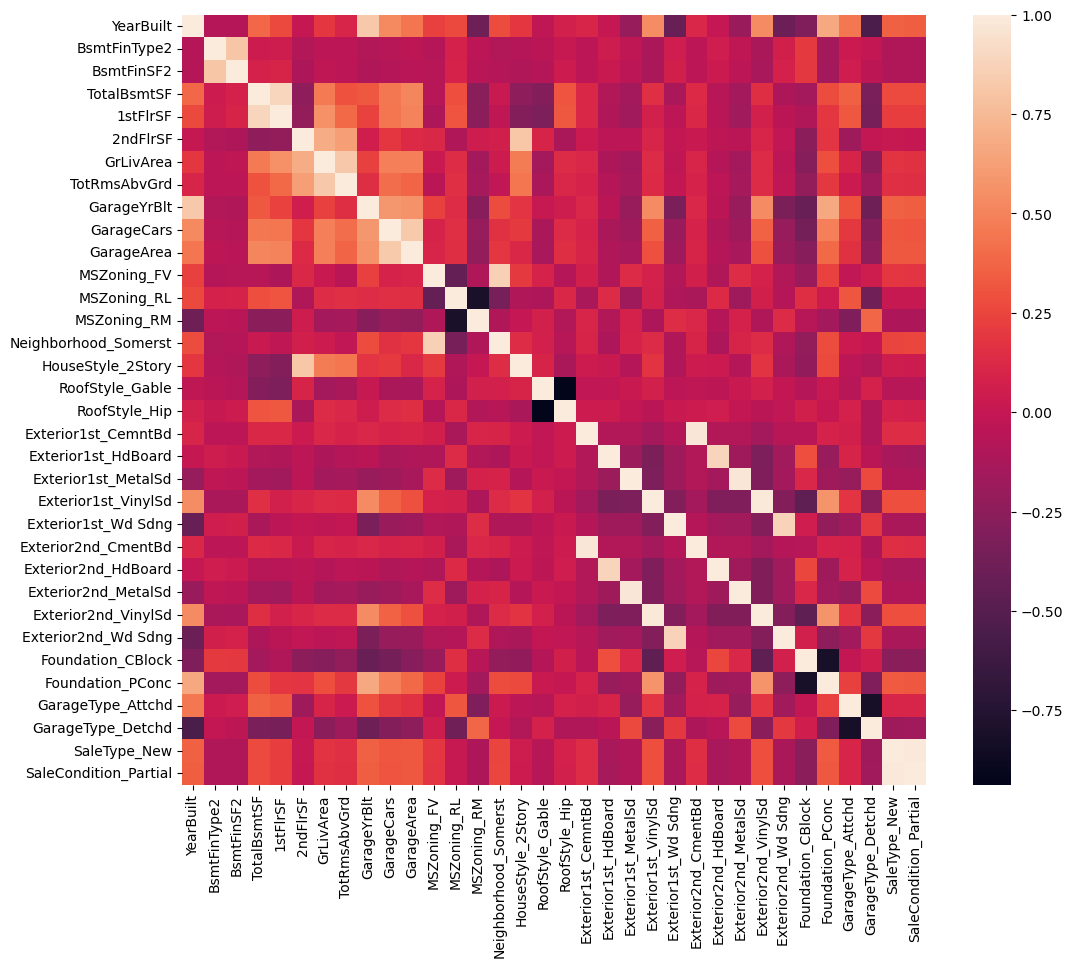

In [261]:
# Make a heatmap of the filtered maxtrix
plt.subplots(figsize=(12, 10))
sns.heatmap(filtered_corr_matrix)
plt.show()

After filtering for high Pearson correlations above 0.8 and highlighting them in red, I observed that some one-hot encoded categories exhibit strong correlations, such as GarageType_Detchd vs. GarageType_Attchd. This can lead to multicollinearity in linear models. To mitigate this, I should drop the most common category rather than the first when performing one-hot encoding. However, for tree-based models, multicollinearity is not a concern. I may adjust this approach later based on model performance.  
Notablely, SalePrice is not included in this highly correlated matrix. However, the strongest correlation with SalePrice is observed with OverallQual, which has a correlation coefficient of 0.78. 

## 4.2 Barplot view

In [281]:
# To display only the rows and columns that contain yellow background cells and exclude those without
corr_matrix = df_train.corr()

# Extract the relevant portion of the correlation matrix
corr_matrix_withPrice = corr_matrix.loc[['SalePrice'], (abs(corr_matrix['SalePrice']) > 0.5) & (abs(corr_matrix['SalePrice']) < 1) ]
price_corr_features = corr_matrix_withPrice.columns.tolist()

# Sort in descending order by absolute correlation values
corr_matrix_withPrice = corr_matrix_withPrice.T
corr_matrix_withPrice = corr_matrix_withPrice.abs().sort_values(by='SalePrice', ascending=False)

# Disply the matrix
corr_matrix_withPrice

,SalePrice
OverallQual,0.783546
GrLivArea,0.711706
ExterQual,0.669504
KitchenQual,0.650226
BsmtQual,0.643452
GarageCars,0.640154
GarageArea,0.607535
1stFlrSF,0.604714
TotalBsmtSF,0.602042
FullBath,0.569313


In [285]:
print(price_corr_features)

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageFinish', 'GarageCars', 'GarageArea']


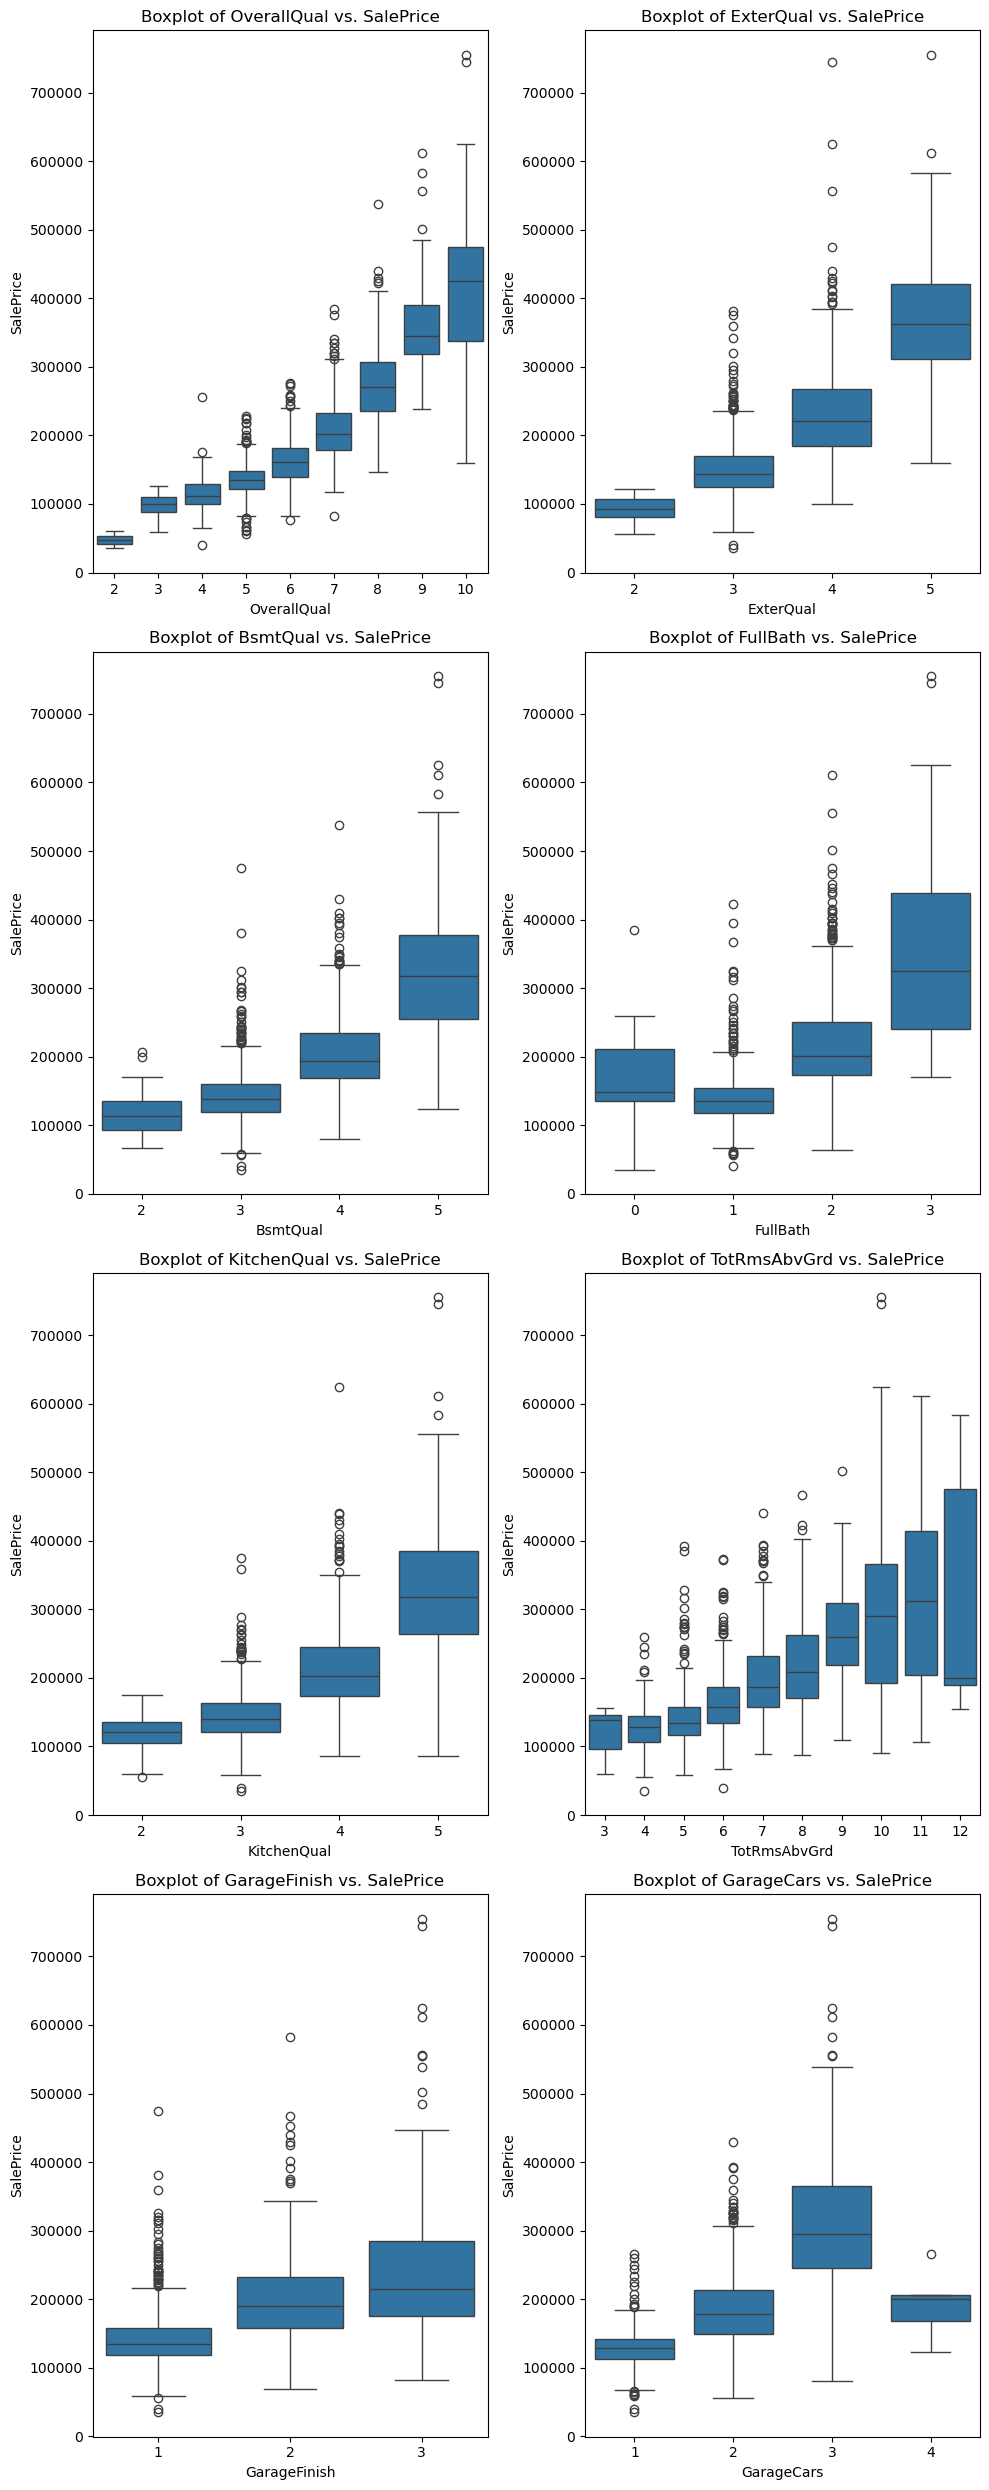

In [282]:
fig, axes = plt.subplots(4, 2, figsize=(10, 25))
axes = axes.flatten()
i = 0
for col in price_corr_features:
    if df_train[col].nunique() < 12: 
        sns.boxplot(x=df_train[col], y=df_train['SalePrice'], ax=axes[i])
        axes[i].set_title(f"Boxplot of {col} vs. SalePrice")
        i += 1

plt.tight_layout()
plt.show()

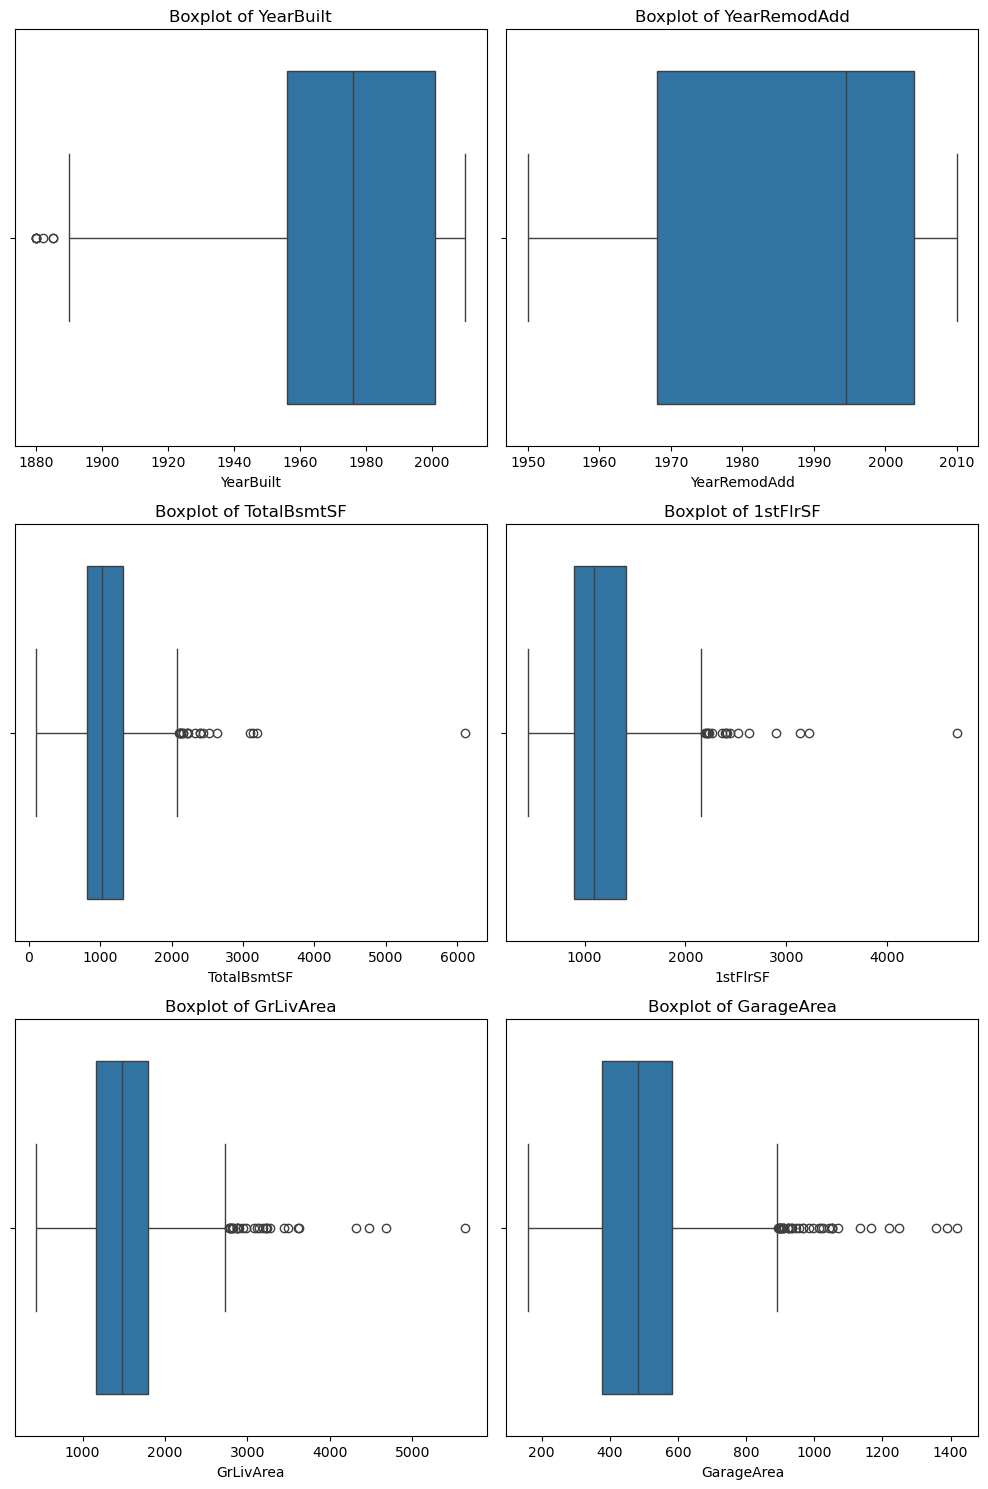

In [283]:
fig, axes = plt.subplots(3, 2, figsize=(10, 15))
axes = axes.flatten()
i = 0
for col in price_corr_features:
    if df_train[col].nunique() > 12: 
        sns.boxplot(x=df_train[col], ax=axes[i])
        axes[i].set_title(f"Boxplot of {col}")
        i += 1

plt.tight_layout()
plt.show()

## 4.3. Scatter Plots of highly correlated features

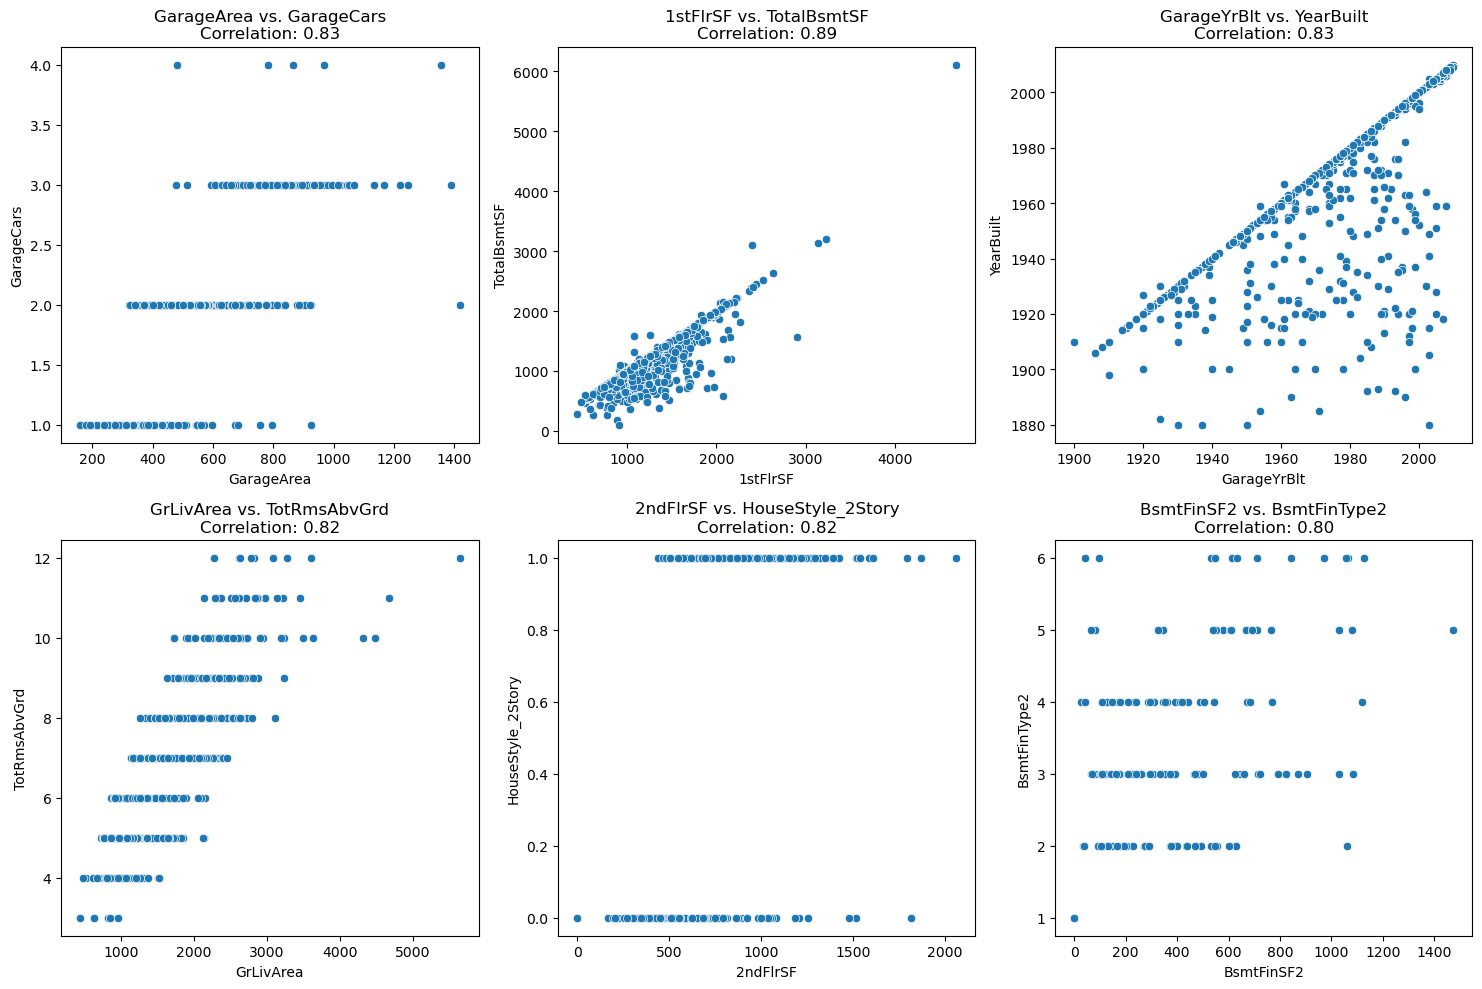

In [265]:
threshold = 0.8

# Identify binary features (those with only 2 unique values)
binary_features = [col for col in df_train.columns if df_train[col].nunique() == 2]

# Find feature pairs with high correlation (excluding self-correlation)
high_corr_pairs = []
for col in filtered_corr_matrix.columns:
    for row in filtered_corr_matrix.index:
        if col != row and abs(filtered_corr_matrix.loc[row, col]) > threshold:
            # Ensure at Least one variable is Not binary
            if not (col in binary_features and row in binary_features):
                high_corr_pairs.append((row, col))

# Remove duplicate pairs (since correlation matrix is symmetric)
unique_high_corr_pairs = list(set((tuple(sorted(pair))) for pair in high_corr_pairs))

# Create subplots
num_pairs = len(unique_high_corr_pairs)
cols = 3 # Number of columns in subplot grid
rows = int(np.ceil(num_pairs/cols))

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows)) # Dynamic size adjustment
axes = axes.flatten() # Flatten axes array for easy indexing

# Plot scatter plots for each highly correlated pair
for idx, (feature1, feature2) in enumerate(unique_high_corr_pairs):
    sns.scatterplot(x=df_train[feature1], y=df_train[feature2], ax=axes[idx])
    axes[idx].set_title(f"{feature1} vs. {feature2}\nCorrelation: {corr_matrix.loc[feature1, feature2]:.2f}")

# Remove empty subplots (if any)
for i in range(idx + 1, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [267]:
df_train.shape

(1338, 177)

# 5. Save Datasets

In [284]:
# Save the two datasets
from library.sb_utils import save_file
current_dir = os.getcwd()
save_file(df_train, "df_train_EDA.csv", current_dir)
save_file(df_test, "df_test_EDA.csv", current_dir)

A file already exists with this name.

Writing file.  "c:\Users\Sheng Miao\OneDrive\桌面\SpringBoard\Springboard_MyProjects\Capstone_Two\df_train_EDA.csv"
A file already exists with this name.



IndexError: string index out of range

# 6. Summary

### 1. Remove missing values that account for less than 5% of the total records, as well as those in five garage-related variables—GarageType, GarageYrBlt, GarageFinish, GarageQual, and GarageCond—which, despite accounting for slightly more than 5% (but less than 6%) of the total records, exhibit a consistent missing pattern within the same group of records. These two steps result in the removal of 122 records (8.4% of the total) from the training dataset and 139 records (9.5% of the total) from the test dataset. LotFrontage has 15–20% missing values in both datasets. Its missing values were imputed using predictions based on its correlated variable, 1stFlrSF. 

### 2. Five categorical variables—Street, Utilities, LandSlope, Heating, and Condition2, and one numerical variable--PoolArea, were dropped from both datasets due to their highly skewed distribution and minimal impact on SalePrice.

### 3. Among the 32 categorical variables, 14 with a clear ranking were converted to numeric values using ordinal encoding, CentralAir was binary encoded, and the remaining variables were transformed using one-hot encoding. Consequently, the training dataset now contains 1338 records with 178 columns, while the testing dataset consists of 1320 records with 177 columns. 

### 4. Visualizing the relationships between variables reveals that the following variables are highly correlated with the target variable, SalePrice (absolute value of the correlation coefficient, |r| > 0.5): 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd', 'GarageFinish', 'GarageCars', 'GarageArea'. 